In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns


In [69]:
df = pd.read_csv('wines_SPA.csv')
df = df.drop(columns=['winery','country','region','num_reviews'])

In [70]:
label_encoder = LabelEncoder()
df['wine_encoded'] = label_encoder.fit_transform(df['wine'])
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

In [77]:
df['year'] = df['year'].replace('N.V.', np.NaN)
imputer = SimpleImputer(strategy='most_frequent')
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = imputer.fit_transform(df[object_columns])
df['year'] = df['year'].astype(np.int64)

In [71]:
numerical_columns = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [72]:
null_values = df.isnull().sum()
print(null_values)

wine              0
year              2
rating            0
price             0
type            545
body              0
acidity           0
wine_encoded      0
type_encoded      0
dtype: int64


In [94]:
df = (df-df.mean())/df.std()
df.head()

,acidity,body,price,rating,type,type_encoded,wine,wine_encoded,year
0,0.234120,1.570221,6.217909,5.465322,NaN,1.640694,NaN,1.257290,-0.058537
1,-4.151132,-0.295595,1.685354,5.465322,NaN,1.410909,NaN,1.516454,0.674395
2,0.234120,1.570221,1.761506,4.618073,NaN,-0.197584,NaN,1.339359,-0.644882
3,0.234120,1.570221,4.209086,4.618073,NaN,-0.197584,NaN,1.339359,-2.110745
4,0.234120,1.570221,4.775073,4.618073,NaN,-0.197584,NaN,1.339359,-2.550504


In [109]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("Number of outliers removed:", len(df) - len(df_no_outliers))


Number of outliers removed: 4478


<ipython-input-109-8b68ae56f5f7>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-109-8b68ae56f5f7>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-109-8b68ae56f5f7>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
<ipython-input-109-8b68ae56f5f7>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparison

In [110]:
y = df.iloc[:, -4].values
X = df.drop(columns=['price'])
X = X.drop(columns=['wine','type','type_encoded'])

<ipython-input-111-9c86a81425f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


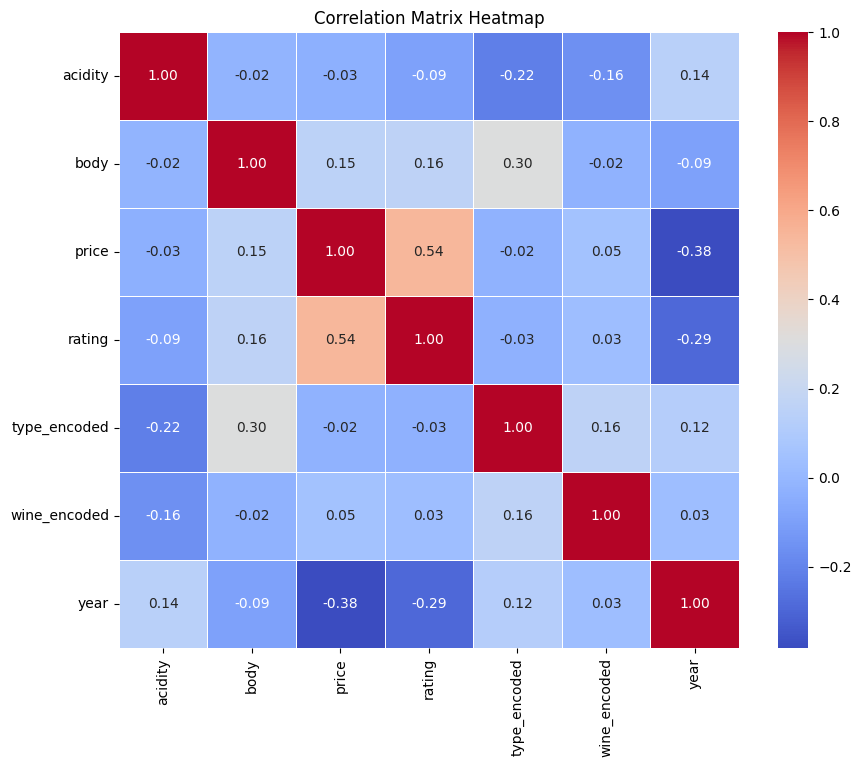

In [111]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [113]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [114]:
models = {}
def train_validate_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    models[index] = r2

In [115]:
model_list = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
              RandomForestRegressor,GradientBoostingRegressor]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge', 'Decision Tree Regressor', 'Linear SVR',
               'KNeighbors Regressor', 'Random Forest Regressor','GradientBosstingRegressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1

In [116]:
models

{'Linear Regression': 0.1951597654962578,
 'Lasso': -0.0021941725558101144,
 'Ridge': 0.1951598146320498,
 'Bayesian Ridge': 0.1951583238088359,
 'Decision Tree Regressor': 0.7015865852072032,
 'Linear SVR': -0.03208957266383039,
 'KNeighbors Regressor': 0.7918658915316562,
 'Random Forest Regressor': 0.8231690513673763,
 'GradientBosstingRegressor': 0.8083165276847154}